# Data Exploration: CO2 Emission
---

In [39]:
%%time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  datetime import datetime as dt
plt.style.use('fivethirtyeight')
%matplotlib inline

CPU times: user 1.23 ms, sys: 803 µs, total: 2.04 ms
Wall time: 1.95 ms


---
### Load Primary Dataset (global-co-concentration-ppm)
---

In [30]:
df_co2 = pd.read_csv ('../data/firstPass/global-co-concentration-ppm.csv', index_col = 'Year')
df_co2.sample (5)

,Entity,Code,CO2 concentrations (NOAA (2017)) (parts per million)
Year,,,
1998,Global,NaN,365.55
2016,Global,NaN,402.87
1995,Global,NaN,360.03
1984,Global,NaN,343.98
2002,Global,NaN,372.42


In [31]:
# Cleanup the dataframe
df_co2 = df_co2.drop (['Code', 'Entity'], axis = 1)
df_co2 = df_co2.rename (index = str, columns = {'CO2 concentrations (NOAA (2017)) (parts per million)': 'Concentration'})
df_co2.head ()

,Concentration
Year,
1980,338.80
1981,339.99
1982,340.76
1983,342.44
1984,343.98


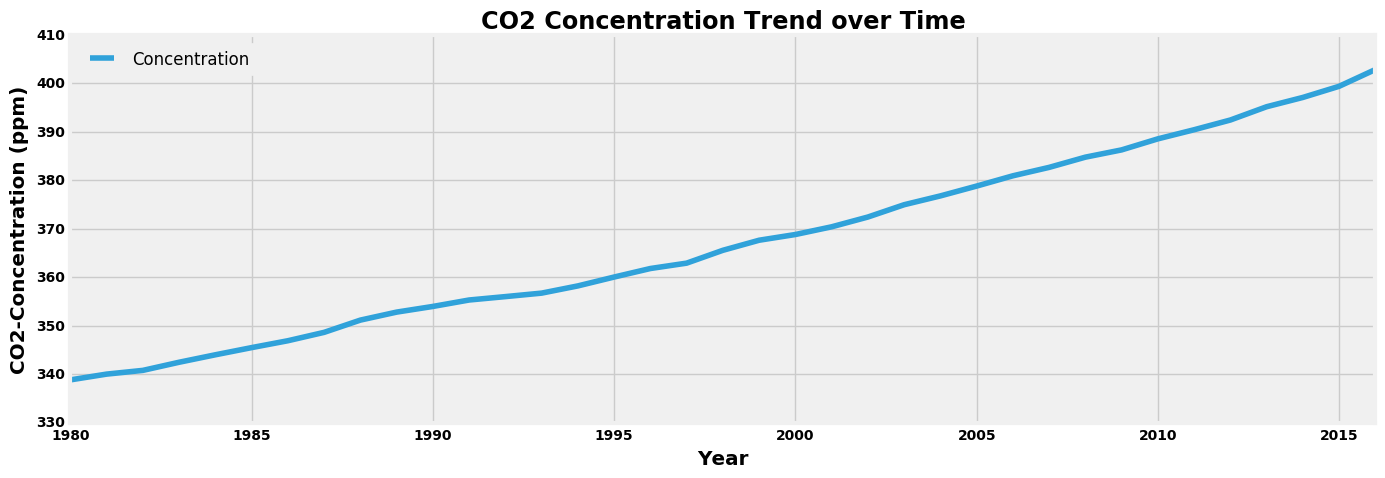

In [32]:
# Visualize the dataframe
df_co2.plot (figsize = (15, 5))
plt.xlabel ('Year', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel ('CO2-Concentration (ppm)', fontweight = 'bold', fontsize = 'x-large')
plt.xticks (fontweight = 'bold')
plt.yticks (fontweight = 'bold')
plt.title ('CO2 Concentration Trend over Time', fontweight = 'bold', fontsize = 'xx-large')
plt.grid ('on')
plt.show ()

---
### Problem
This dataset only contains value post year 1980 whereas our range of interest is from 1900 till present; for our purposes, this dataset is too small.


### Consider Second Dataset (annual-co-emission-per-country)
---

In [34]:
df2_co2 = pd.read_csv ('../data/co2/annual-co-emissions-per-country.csv', index_col = 'Year')
df2_co2.sample (5)

,Entity,Code,Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)
Year,,,
1884,Bolivia,BOL,0.00
1807,Romania,ROU,0.00
1848,Barbados,BRB,0.00
2015,Cuba,CUB,36.19
1774,South Africa,ZAF,0.00


In [35]:
# Cleanup the dataframe
df2_co2 = df2_co2.rename (index = str, columns = {'Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)': 'Concentration'})
df2_co2 = df2_co2.drop (['Entity', 'Code'], axis = 1)
df2_co2.tail ()

,Concentration
Year,
2012,7.79
2013,11.67
2014,12.01
2015,11.73
2016,11.14


In [36]:
# Aggregate the values by year
df2_aggCo2 = df2_co2.groupby (df2_co2.index)[['Concentration']].sum ()
df2_aggCo2.sample (5)

,Concentration
Year,
1839,111.79554
1792,21.93192
1791,21.45482
1967,63818.68129
1984,100481.81560


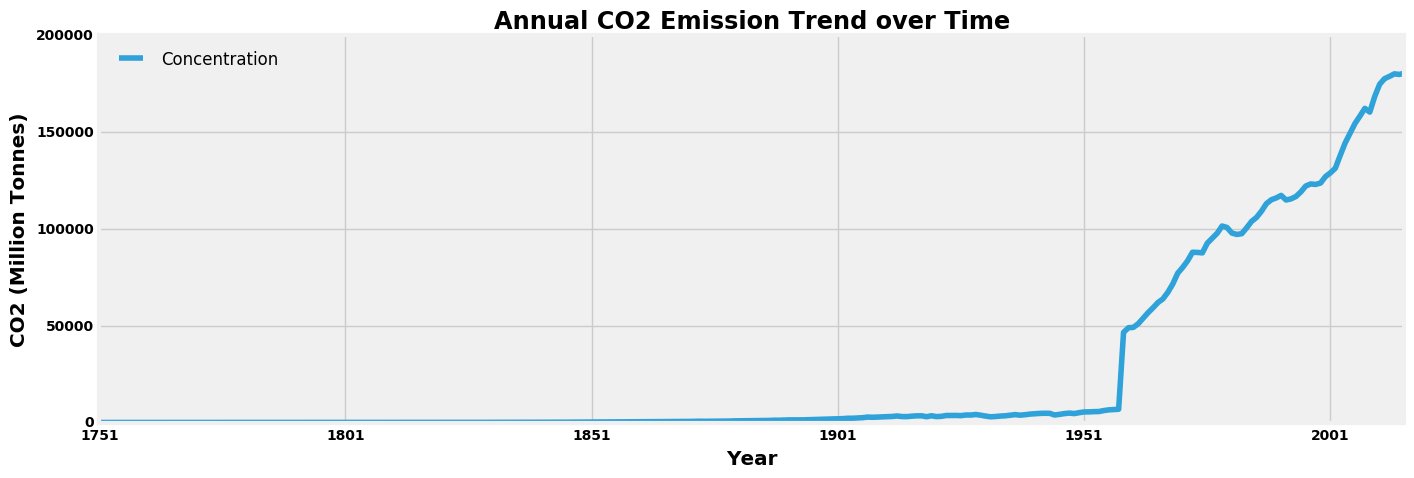

In [37]:
# Visalize the dataframe
df2_aggCo2.plot (figsize = (15, 5))
plt.xlabel ('Year', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel ('CO2 (Million Tonnes)', fontweight = 'bold', fontsize = 'x-large')
plt.xticks (fontweight = 'bold')
plt.yticks (fontweight = 'bold')
plt.title ('Annual CO2 Emission Trend over Time', fontweight = 'bold', fontsize = 'xx-large')
plt.grid ('on')
plt.show ()

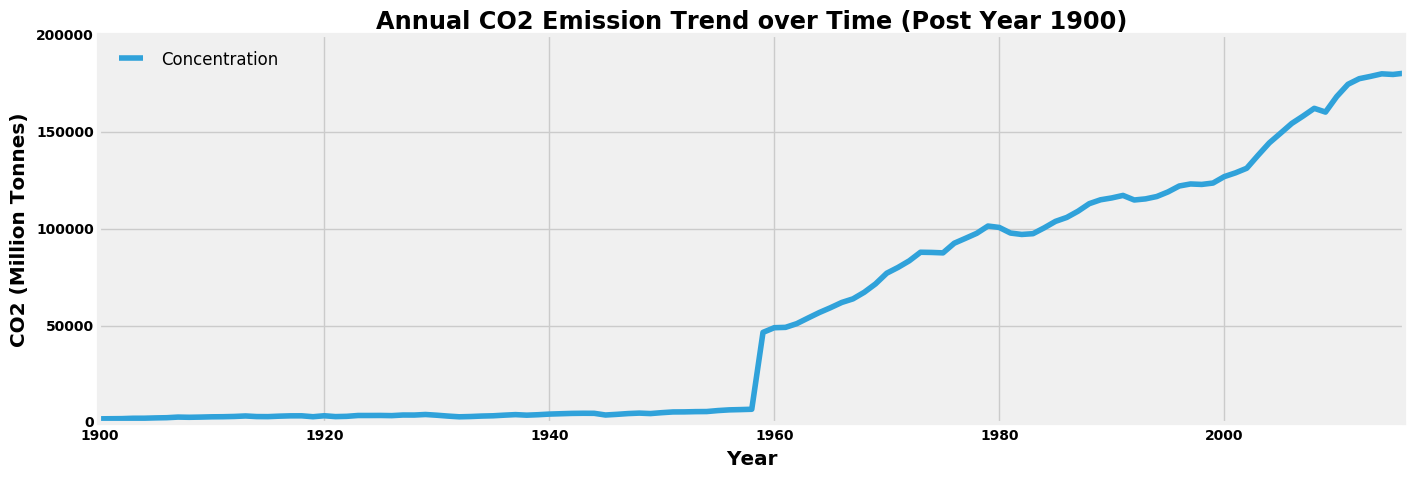

In [38]:
# Slice the dataframe to retain values post year 1899
df2_aggCo2Post1900 = df2_aggCo2 [df2_aggCo2.index > '1899']
df2_aggCo2Post1900.plot (figsize = (15, 5))
plt.xlabel ('Year', fontweight = 'bold', fontsize = 'x-large')
plt.ylabel ('CO2 (Million Tonnes)', fontweight = 'bold', fontsize = 'x-large')
plt.xticks (fontweight = 'bold')
plt.yticks (fontweight = 'bold')
plt.title ('Annual CO2 Emission Trend over Time (Post Year 1900)', fontweight = 'bold', fontsize = 'xx-large')
plt.grid ('on')
plt.show ()

# Observation
---
This dataset (annual-co-emission-per-country.csv) looks more promising for this project.